In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
inlet_x=-0.5
outlet_x=1.1

In [4]:
cd ~/

/home/rp3e11


In [5]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True
import os

# Reference Data

In [6]:
#SS
temp_s=np.array([0.,1.521,3.506,6.002,9.41,12.81,16.22,19.63,23.042,26.44,29.849,33.261,36.659,40.068,43.478,46.879,50.291,
              53.699,57.098,60.51,63.921,67.33,70.73,74.14,77.548,80.948,84.36]
                )
temp_HTC=np.array([559.4,499.4,470.7,431.9,433.1,409.5,360.1,313.8,245.9,215.1,208.9,194,166.2,160.3,154.9,145,131.3,
                    116.1,89.4,80.8,99.9,201,279.8,339,516.8,494.3,457.2])
MUR224=np.empty([2,len(temp_s)])
MUR224[0,:]=temp_s[:]
MUR224[1,:]=temp_HTC[:]
temp_HTC=np.array([523.2,466.9,434.5,395.8,399.6,380.5,338.9,297.8,235.4,206.8,201.8,187,165.1,155.9,150.1,139.6,123.3,
                   103.6,79.2,69.6,66.3,74.8,142.2,228.4,399.9,479.7,481.9])
MUR226=np.empty([2,len(temp_s)])
MUR226[0,:]=temp_s[:]
MUR226[1,:]=temp_HTC[:]

temp_HTC=np.array([772.7,692.1,641.9,584.0,582.8,548.9,485.5,423.6,338.2,300.6,305.5,296.7,280.9,293.4,306.6,310.9,326.3
                  ,340.8,365.8,445.9,643.8,834.1,803.0,773.2,748.1,732.9,691.6])
MUR235=np.empty([2,len(temp_s)])
MUR235[0,:]=temp_s[:]
MUR235[1,:]=temp_HTC[:]

# temp_HTC=np.array([534.6,483.0,453.1,414.0,416.1,391.8,345.9,300.9,235.7,206.7,201.1,188.9,163.8,128.6,126.1,125.4,119.2,
#                    112.1,104.6,96.0,92.0,74.0,32.3,32.6,130.3,413.5,492.9])
# MUR222=np.empty([2,len(temp_s)])
# MUR222[0,:]=temp_s[:]
# MUR222[1,:]=temp_HTC[:]
#PS
temp_s=np.array([1.515,3.5,6,9.821,13.641,17.46,21.279,28.92,32.741,36.559,40.38,44.2,48.019,55.661,59.48,63.299])
temp_HTC=np.array([541.2,359.7,295,253.2,233.6,224.5,219.5,225.3,234.4,239.3,254,260.3,267.9,268.9,256,230.2])
tM=np.empty([2,len(temp_s)])
for j in range(len(temp_s)-1,-1,-1):
    tM[0,j]=-temp_s[len(temp_s)-1-j]
    tM[1,j]=temp_HTC[len(temp_s)-1-j]
MUR224=np.concatenate([tM,MUR224],axis=1)
temp_HTC=np.array([506.1,324.2,261.6,222.7,204.5,195.1,188.8,192.8,202.5,211.2,225,234.5,242.4,247.2,236.7,224.8])
tM[1,:]=temp_HTC
for j in range(len(temp_s)-1,-1,-1):
    tM[0,j]=-temp_s[len(temp_s)-1-j]
    tM[1,j]=temp_HTC[len(temp_s)-1-j]
MUR226=np.concatenate([tM,MUR226],axis=1)

temp_HTC=np.array([755.0,505.4,416.4,362.5,338.3,330.9,326.7,347.5,365.6,381.9,399.4,412.6,424.3,434.5,422.5,384.8])
tM[1,:]=temp_HTC
for j in range(len(temp_s)-1,-1,-1):
    tM[0,j]=-temp_s[len(temp_s)-1-j]
    tM[1,j]=temp_HTC[len(temp_s)-1-j]
MUR235=np.concatenate([tM,MUR235],axis=1)


# for j in range(len(temp_s)-1,-1,-1):
#     tM[0,j]=-temp_s[len(temp_s)-1-j]
#     tM[1,j]=temp_HTC[len(temp_s)-1-j]
# temp_HTC=np.array([519.3,341.4,279.9,239.7,222.0,214.3,207.4,0.0,210.9,219.9,229.3,239.3,247.3,253.0,0.0,254.3,241.7,223.9])
# tM[1,:]=temp_HTC
# MUR222=np.concatenate([tM,MUR222],axis=1)




#nondimensionalize according to Wheeler 2016 TUR138
kw=2.624*10**(-2)
ax_chord=0.036985
# MUR222[0,:]/=ax_chord*1000.
MUR224[0,:]/=ax_chord*1000.
MUR226[0,:]/=ax_chord*1000.
MUR235[0,:]/=ax_chord*1000.

# MUR222[1,:]=MUR222[1,:]*ax_chord/kw
MUR224[1,:]=MUR224[1,:]*ax_chord/kw
MUR226[1,:]=MUR226[1,:]*ax_chord/kw
MUR235[1,:]=MUR235[1,:]*ax_chord/kw



In [25]:
colors=['b','r','g','k','brown','m']

In [41]:
cases=['HPT_500k/HPT_LS05_DOM30_TI5/','HPT_500k/HPT_LS05_DOM30_TI20/','HPT_500k/HPT_LS20_DOM80_TI5/',
       'HPT_500k/HPT_LS20_DOM80_TI20/','HPT_1M/DOM30_LS05_TI5/','HPT_1M/DOM30_LS05_TI20/']
labels=['R500k_T5_L5','R500k_T20_L5','R500k_T5_L20','R500k_T20_L20','R1M_T10_L5','R1M_T30_L5']
infiles=['cascade3d_post.in','cascade3d_post.in','cascade3d_post.in','cascade3d_post.in','NEW_vki.in','NEW_vki.in']
n_c=len(cases)

In [42]:
cascades=[]
for i in range(n_c):
    filen=cases[i]+'case_sel/STAT_cont'
    cascades.append(l.cascade_mean(inlet_x,outlet_x,filename=filen,infile=cases[i]+'/'+infiles[i],Refplane='Outlet',chord=1.74
                                  ,HeatTransfer=True,label=labels[i].replace('_',' ')))

reading inlet and outlet
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
198
reading blade
Reading file in CGNS format
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
3 i= 224
Reading file in CGNS format
extract line from (i,j) 224 1  to  224 224  in block  3 224
reading data from file previously extracted
5 i= 224
Reading file in CGNS format
extract line from (i,j) 224 1  to  224 672  in block  5 672
reading data from file previously extracted
7 i= 224
Reading file in CGNS format
extract line from (i,j) 224 1  to  224 384  in block  7 384
reading data from file previously extracted
finished reading blade
len=1.57321798801
len=1.57321802527
dTdn [-112.83270171 -104.79215762 -103.39782521 -107.78654592 -115.67090007]
mu [  1.13555898e-05   1.13555898e-05   1.13555898e-05   1.13555898e-05
   1.13555898e-05]
reading inlet and outlet
Readin

<IPython.core.display.Javascript object>


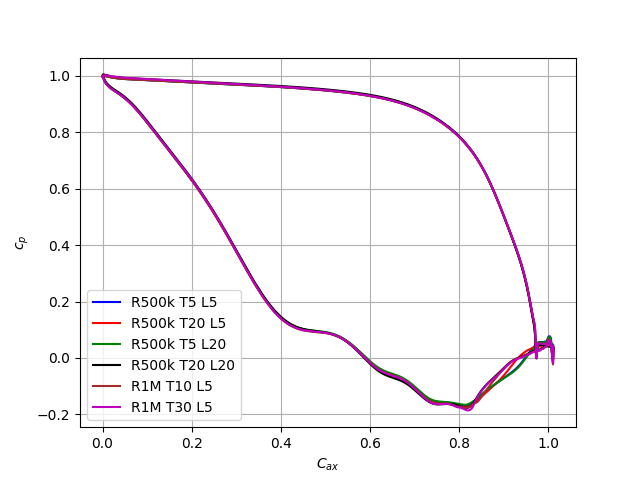

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


In [46]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.data[:,0],cascades[i].cp,label=cascades[i].label,color=colors[i])
plt.grid()
plt.legend()
plt.xlabel('$C_{ax}$')
plt.ylabel('$c_p$')
tikz_save('cp_comp_all.tikz',figureheight='\\fh',figurewidth='\\fw')

<IPython.core.display.Javascript object>


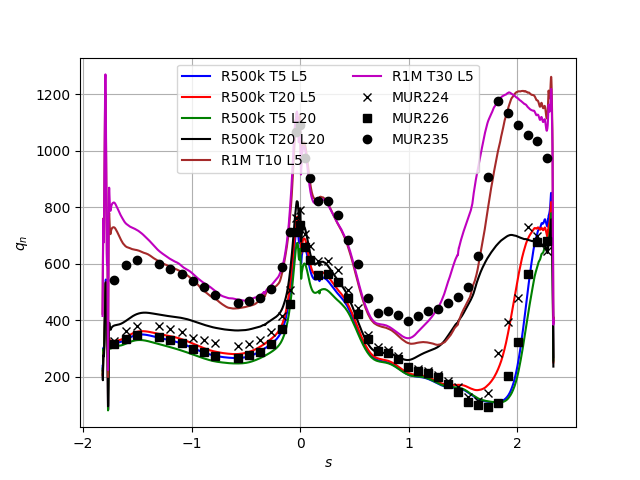

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
\usepgfplotslibrary{plotmarks}


In [44]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:],cascades[i].blade.qnorm_new,label=cascades[i].label
            ,color=colors[i])
plt.plot(MUR224[0,:],MUR224[1,:],'kx',label='MUR224')
plt.plot(MUR226[0,:],MUR226[1,:],'ks',label='MUR226')
plt.plot(MUR235[0,:],MUR235[1,:],'ko',label='MUR235')
plt.grid()
plt.legend(ncol=2)
plt.xlabel('$s$')
plt.ylabel('$q_{n}$')
plt.savefig('tau_w_all_cases.eps')
tikz_save('qn_comp_all.tikz',figureheight='\\fh',figurewidth='\\fw')

<IPython.core.display.Javascript object>


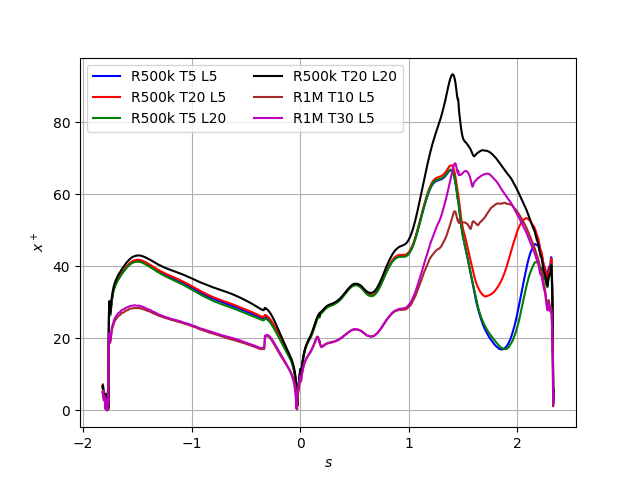

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


<IPython.core.display.Javascript object>


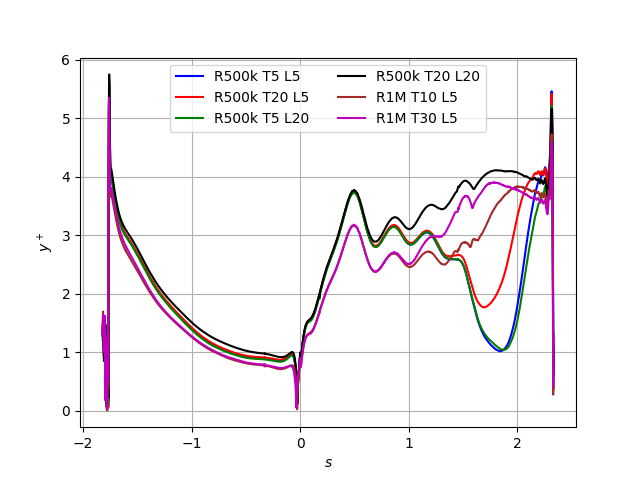

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


<IPython.core.display.Javascript object>


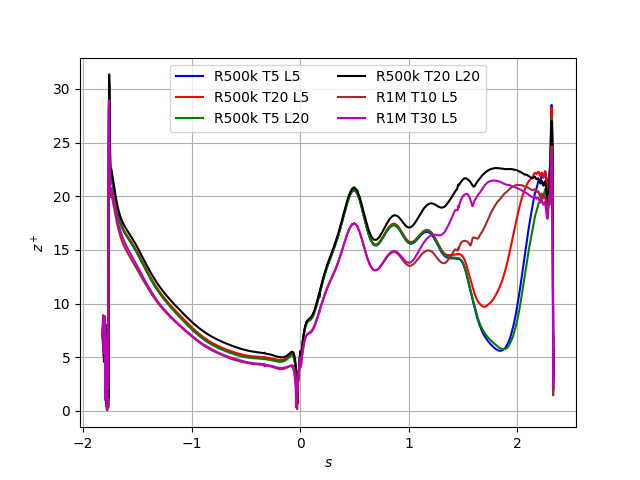

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


<IPython.core.display.Javascript object>


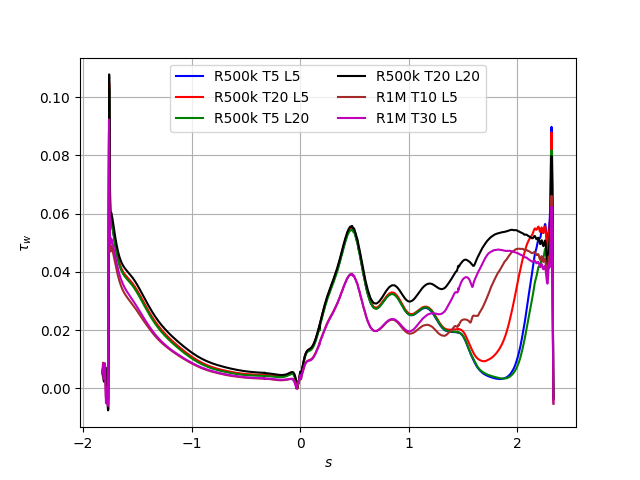

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


In [45]:
plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:],cascades[i].blade.plus_coords[:,0],label=cascades[i].label,color=colors[i])
plt.grid()
plt.legend(ncol=2)
plt.xlabel('$s$')
plt.ylabel('$x^+$')
plt.savefig('x_plus_all_cases.eps')
tikz_save('xp_comp_all.tikz',figureheight='\\fh',figurewidth='\\fw')


plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:],cascades[i].blade.plus_coords[:,1],label=cascades[i].label,color=colors[i])
plt.grid()
plt.legend(ncol=2)
plt.xlabel('$s$')
plt.ylabel('$y^+$')
plt.savefig('y_plus_all_cases.eps')
tikz_save('yp_comp_all.tikz',figureheight='\\fh',figurewidth='\\fw')


plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:],cascades[i].blade.plus_coords[:,2],label=cascades[i].label,color=colors[i])
plt.grid()
plt.legend(ncol=2)
plt.xlabel('$s$')
plt.ylabel('$z^+$')
tikz_save('zp_comp_all.tikz',figureheight='\\fh',figurewidth='\\fw')
plt.savefig('z_plus_all_cases.eps')


plt.figure()
for i in range(n_c):
    plt.plot(cascades[i].blade.dist[:],cascades[i].blade.cf,label=cascades[i].label,color=colors[i])
plt.grid()
plt.legend(ncol=2)
plt.xlabel('$s$')
plt.ylabel(r'$\tau_w$')
plt.savefig('tauw_comp_all_cases.eps')
tikz_save('tauw_comp_all.tikz',figureheight='\\fh',figurewidth='\\fw')

In [29]:
p_in=[-1.,0.]
p_LE=[-0.1,0.]
inlet_stream=l.lines()
for i in range(n_c):
    filen=cases[i]+'case_sel/STAT_cont'    
    inlet_stream.extr_line(p_in,p_LE,100,filename=filen,infile=cases[i]+'/'+infiles[i],label=labels[i])

TypeError: extr_line() got an unexpected keyword argument 'color'

<IPython.core.display.Javascript object>


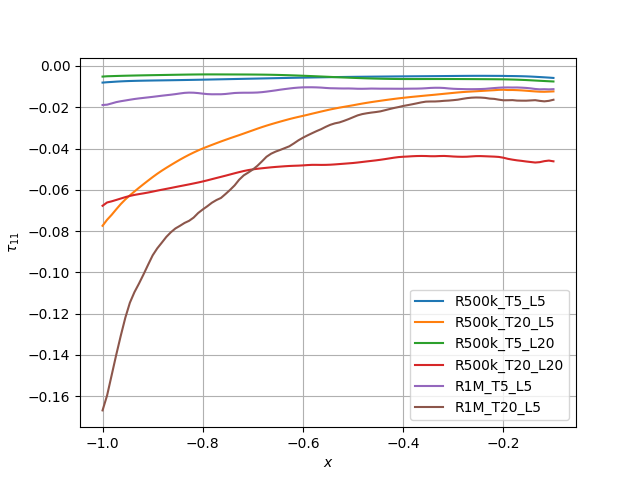

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


<IPython.core.display.Javascript object>


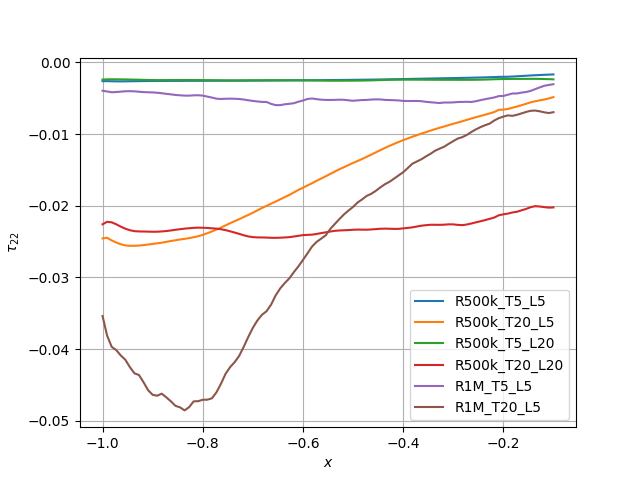

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


<IPython.core.display.Javascript object>


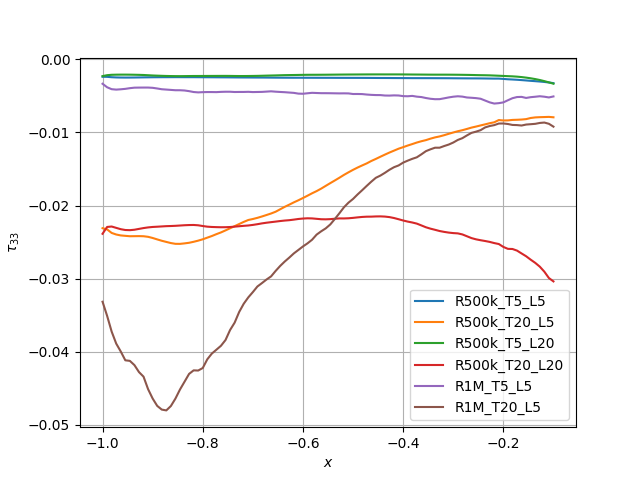

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


<IPython.core.display.Javascript object>


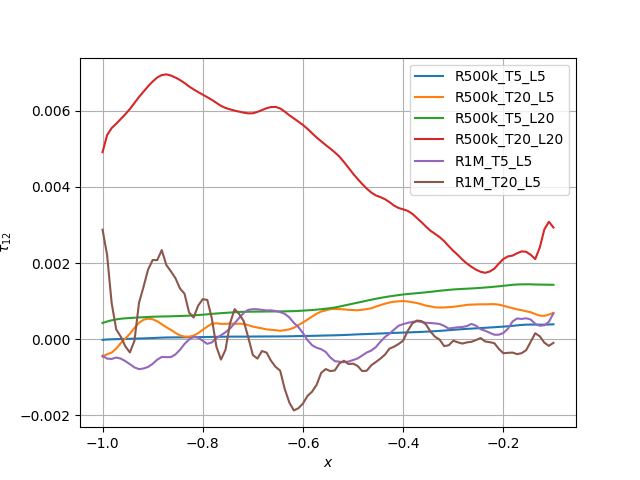

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


In [24]:
inlet_turb_comp=[]
inlet_turb_exp=[]
plt.figure()
l1=inlet_stream.l[0]
t11=l1.var.get_index(101,10)
t12=l1.var.get_index(101,11)
t22=l1.var.get_index(101,12)
t33=l1.var.get_index(101,13) 
for i,l1 in enumerate(inlet_stream.l):
              
    plt.plot(l1.data[:,0],l1.data[:,t11],label=labels[i])
    #plt.plot(l1.data[:,0],inlet_turb_exp[-1],'--',label=labels[i]+' exp',color=colors[i])
plt.legend(loc=0)
plt.xlabel('$x$')
plt.ylabel('$\\tau_{11}$')

plt.grid()
tikz_save('inlet_turb_tau11.tikz',figurewidth='\\fw',figureheight='\\fh')

inlet_turb_comp=[]
inlet_turb_exp=[]
plt.figure()
for i,l1 in enumerate(inlet_stream.l):
    plt.plot(l1.data[:,0],l1.data[:,t22],label=labels[i])
    #plt.plot(l1.data[:,0],inlet_turb_exp[-1],'--',label=labels[i]+' exp',color=colors[i])
plt.legend(loc=0)
plt.xlabel('$x$')
plt.ylabel('$\\tau_{22}$')

plt.grid()
tikz_save('inlet_turb_tau22.tikz',figurewidth='\\fw',figureheight='\\fh')
inlet_turb_comp=[]
inlet_turb_exp=[]
plt.figure()
for i,l1 in enumerate(inlet_stream.l):
    plt.plot(l1.data[:,0],l1.data[:,t33],label=labels[i])
    #plt.plot(l1.data[:,0],inlet_turb_exp[-1],'--',label=labels[i]+' exp',color=colors[i])
plt.legend(loc=0)
plt.xlabel('$x$')
plt.ylabel('$\\tau_{33}$')
plt.grid()
tikz_save('inlet_turb33.tikz',figurewidth='\\fw',figureheight='\\fh')
inlet_turb_comp=[]
inlet_turb_exp=[]
plt.figure()
for i,l1 in enumerate(inlet_stream.l):
    plt.plot(l1.data[:,0],l1.data[:,t12],label=labels[i])
    #plt.plot(l1.data[:,0],inlet_turb_exp[-1],'--',label=labels[i]+' exp',color=colors[i])
plt.legend(loc=0)
plt.xlabel('$x$')
plt.ylabel('$\\tau_{12}$')

plt.grid()
tikz_save('inlet_turb_tau12.tikz',figurewidth='\\fw',figureheight='\\fh')

In [30]:
DNS_folder='HPT_500k/HPT_andy_post/baseline/'
DNS_cascade=l.cascade_mean(-.5976,1.1408703,filename=DNS_folder+'convergence_new/1904100_to_2580100/STAT_cont.bin'
                           ,Refplane='Outlet',infile=DNS_folder+'vki3d.in',chord=1.74,HeatTransfer=True)

reading inlet and outlet
Reading file in STAT_cont.bin format
reading data from file previously extracted
Reading file in STAT_cont.bin format
reading data from file previously extracted
197
reading blade
Reading file in STAT_cont.bin format
extract line from (i,j) 384 1  to  384 1184  in block  4 1184
reading data from file previously extracted
3 i= 384
Reading file in STAT_cont.bin format
extract line from (i,j) 384 1  to  384 480  in block  3 480
reading data from file previously extracted
5 i= 384
Reading file in STAT_cont.bin format
extract line from (i,j) 384 1  to  384 1184  in block  5 1184
reading data from file previously extracted
7 i= 384
Reading file in STAT_cont.bin format
extract line from (i,j) 384 1  to  384 480  in block  7 480
reading data from file previously extracted
finished reading blade
len=1.56960940361
len=1.57030060887
dTdn [-121.14632075 -119.50276217 -118.45058552 -117.96703027 -118.03030082]
mu [  1.13555898e-05   1.13555898e-05   1.13555898e-05   1.13555

In [31]:
LES_fold_doubdom='HPT_500k/LES_jesus/vane5_INTER_SD_refined_x_2/'
LES_doub_cascade=l.cascade_mean(-.5976,1.1408703,filename=LES_fold_doubdom+'convergence/3405100_to_3630100/STAT_cont.bin'
                                ,Refplane='Outlet',infile=LES_fold_doubdom+'cascade3d.in',chord=1.74,HeatTransfer=True)

reading inlet and outlet
Reading file in STAT_cont.bin format
reading data from file previously extracted
Reading file in STAT_cont.bin format
reading data from file previously extracted
198
reading blade
Reading file in STAT_cont.bin format
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
3 i= 224
Reading file in STAT_cont.bin format
extract line from (i,j) 224 1  to  224 224  in block  3 224
reading data from file previously extracted
5 i= 224
Reading file in STAT_cont.bin format
extract line from (i,j) 224 1  to  224 672  in block  5 672
reading data from file previously extracted
7 i= 224
Reading file in STAT_cont.bin format
extract line from (i,j) 224 1  to  224 384  in block  7 384
reading data from file previously extracted
finished reading blade
len=1.57321804762
len=1.57321804017
dTdn [-126.54998448 -123.44794814 -122.12441686 -122.31573027 -123.67272396]
mu [  1.13555898e-05   1.13555898e-05   1.13555898e-05   1.13555898e

<IPython.core.display.Javascript object>


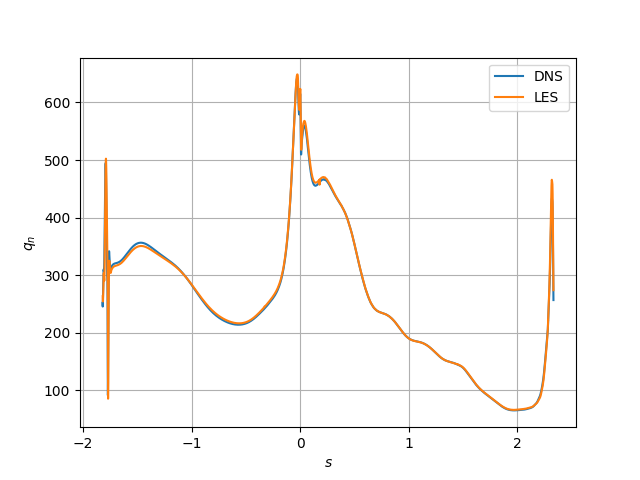

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


In [38]:
plt.figure()
plt.plot(DNS_cascade.blade.dist,DNS_cascade.blade.qnorm_new,label='DNS')
plt.plot(LES_doub_cascade.blade.dist,LES_doub_cascade.blade.qnorm_new,label='LES')
plt.grid()
plt.xlabel('$s$')
plt.ylabel('$q_n$')
plt.legend()
tikz_save('DNS_LES_qn.tikz',figurewidth='\\fw',figureheight='\\fh')

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
